In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/sandeepsrinivasdwaram/Documents/create_dataset/used_car_sales.csv")

## Trend Analysis

### 1. Identify whether car sales are increasing or decreasing over the years.

In [391]:
df['Sold Date'] = pd.to_datetime(df['Sold Date'], errors='coerce')

In [392]:
df['Sold Date'] = df['Sold Date'].replace(pd.Timestamp('1970-01-01'), pd.NaT)

In [393]:
dfsolddate = df.dropna(subset=['Sold Date'])

In [394]:
dfsolddate['Year Sold'] = df['Sold Date'].dt.year

In [395]:
dfsolddate['Year Sold'] = dfsolddate['Sold Date'].dt.year.astype('Int64')

In [396]:
sales_by_year = dfsolddate.groupby('Year Sold').size()

In [397]:
sales_by_year

Year Sold
2015     19
2016     49
2017     85
2018     95
2019    163
2020    162
2021    205
2022    319
2023    416
2024    641
2025     12
dtype: int64

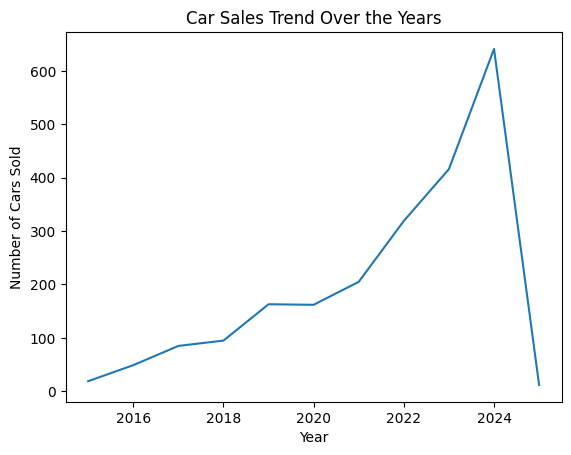

In [398]:
plt.plot(sales_by_year.index, sales_by_year.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.show()

sales_by_year_pct_change = sales_by_year.pct_change() * 100

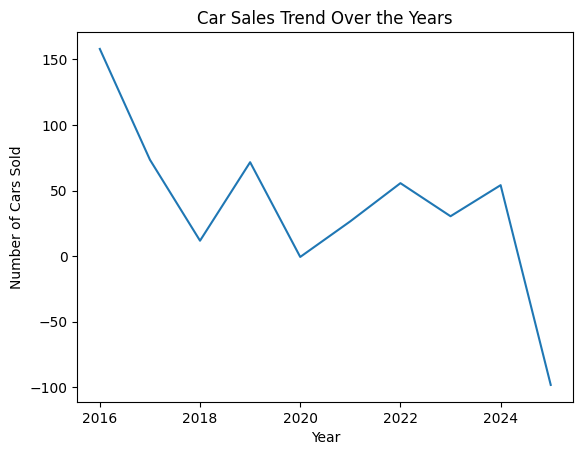

In [399]:
sales_by_year_pct_change

plt.plot(sales_by_year_pct_change.index, sales_by_year_pct_change.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.show()

### 2. Identify whether car purchase by distributors are increasing or decreasing over the years.

In [400]:
df['Purchased Date'] = pd.to_datetime(df['Purchased Date'], errors='coerce')

In [401]:
dfpurchaseddate = df.dropna(subset=['Purchased Date'])

In [402]:
dfpurchaseddate['Purchased Year'] = df['Purchased Date'].dt.year

In [403]:
purchase_by_year = dfpurchaseddate.groupby('Purchased Year').size()

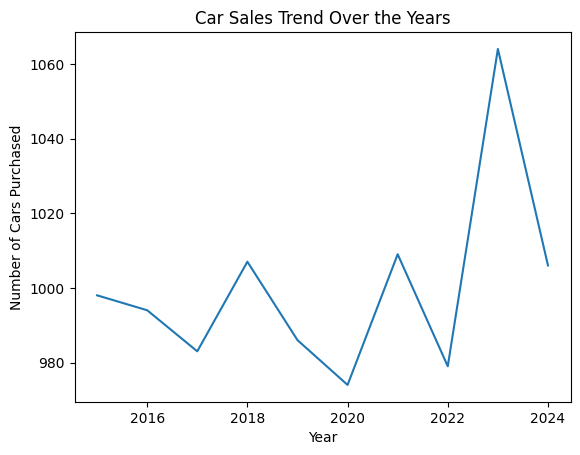

In [404]:
purchase_by_year

plt.plot(purchase_by_year.index, purchase_by_year.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Purchased')
plt.show()

In [405]:
purchase_by_year_pct_change = purchase_by_year.pct_change() * 100

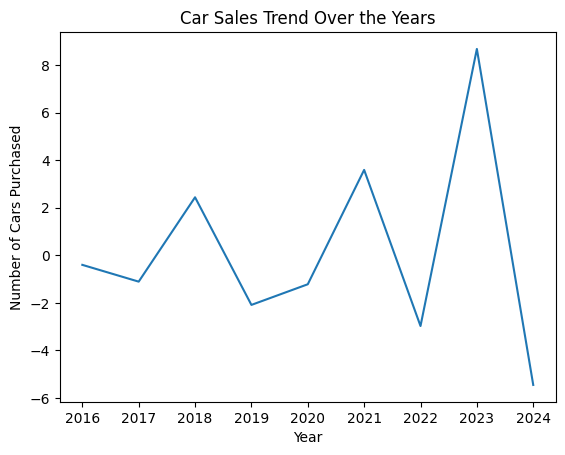

In [406]:
purchase_by_year_pct_change

plt.plot(purchase_by_year_pct_change.index, purchase_by_year_pct_change.values)
plt.title('Car Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars Purchased')
plt.show()

### 3. Examine pricing trends to understand how used car market values are changing.

In [407]:
dfsolddate['Month-Year Sold'] = dfsolddate['Sold Date'].dt.to_period('M')

In [408]:
pricing_trends1 = dfsolddate.groupby('Year Sold')['Price-$'].agg(['mean', 'median', 'min', 'max'])

In [409]:
pricing_trends1

,mean,median,min,max
Year Sold,,,,
2015,7442.105263,7400.0,6100,9900
2016,7810.204082,7600.0,6300,10700
2017,7915.294118,7800.0,6100,10400
2018,7925.263158,7700.0,6200,10400
2019,8037.423313,7900.0,6000,10700
2020,7945.061728,7800.0,6000,10500
2021,7905.365854,7900.0,6000,10900
2022,8096.551724,8000.0,6000,10900
2023,7970.192308,7900.0,6000,10800


In [410]:
pricing_trends2 = dfsolddate.groupby('Year Sold')['Purchased Price-$'].agg(['mean', 'median', 'min', 'max'])

In [411]:
pricing_trends3 = dfsolddate.groupby('Year Sold')['Sold Price-$'].agg(['mean', 'median', 'min', 'max'])

In [412]:
pricing_trends2

,mean,median,min,max
Year Sold,,,,
2015,5971.526316,5950.0,4324,8534
2016,6606.918367,6548.0,4308,9021
2017,6755.223529,6617.0,4341,9371
2018,6704.610526,6521.0,4718,9500
2019,6820.779141,6684.0,4594,9975
2020,6802.049383,6714.5,4231,9880
2021,6635.048780,6620.0,4125,10332
2022,6851.291536,6780.0,4357,10148
2023,6717.548077,6748.5,4400,10024


In [413]:
pricing_trends3

,mean,median,min,max
Year Sold,,,,
2015,6084.105263,6104.0,3293,9028
2016,6846.918367,6516.0,4438,10399
2017,6900.741176,6659.0,3951,9452
2018,6818.315789,6691.0,3718,10214
2019,6806.429448,6571.0,3822,10315
2020,6833.833333,6778.5,3903,10727
2021,6739.653659,6768.0,3091,11657
2022,7023.554859,6994.0,3223,11382
2023,6913.639423,6982.5,3381,11075


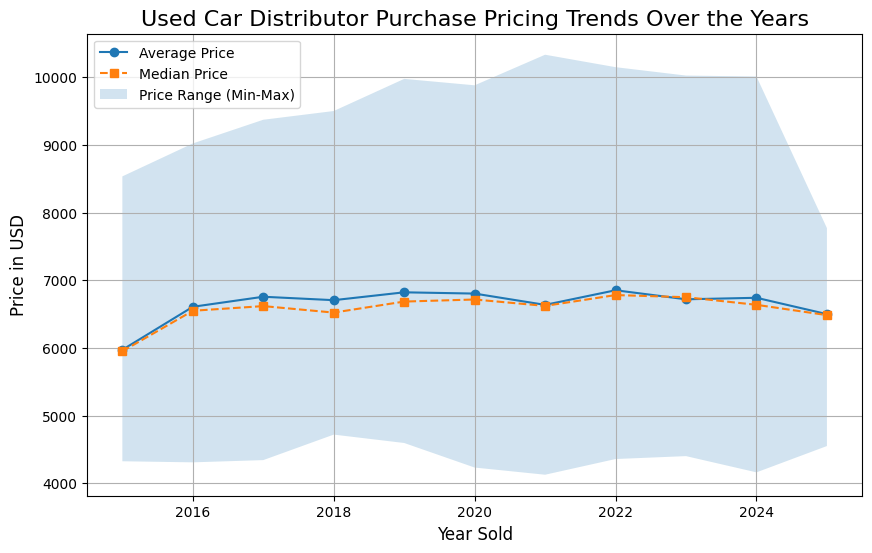

In [414]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends2.index, pricing_trends2['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends2.index, pricing_trends2['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends2.index, pricing_trends2['min'], pricing_trends2['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Distributor Purchase Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

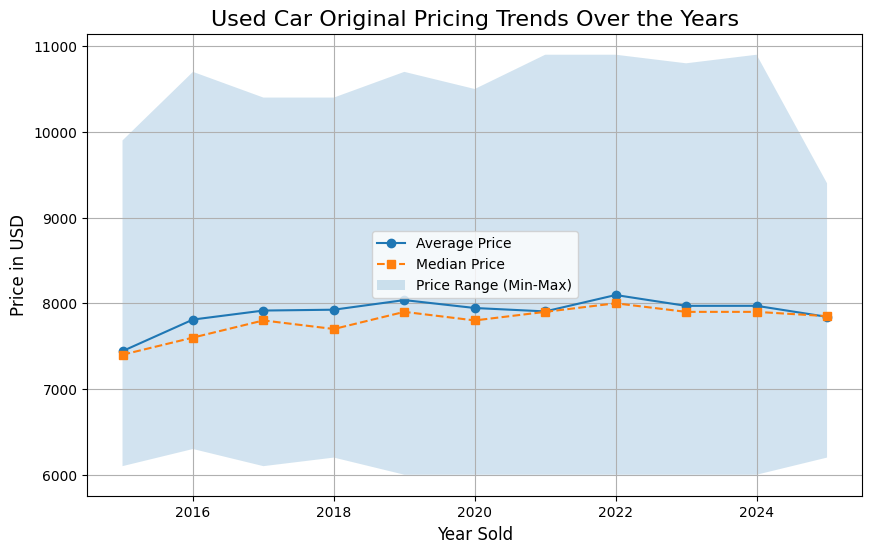

In [415]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends1.index, pricing_trends1['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends1.index, pricing_trends1['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends1.index, pricing_trends1['min'], pricing_trends1['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Original Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

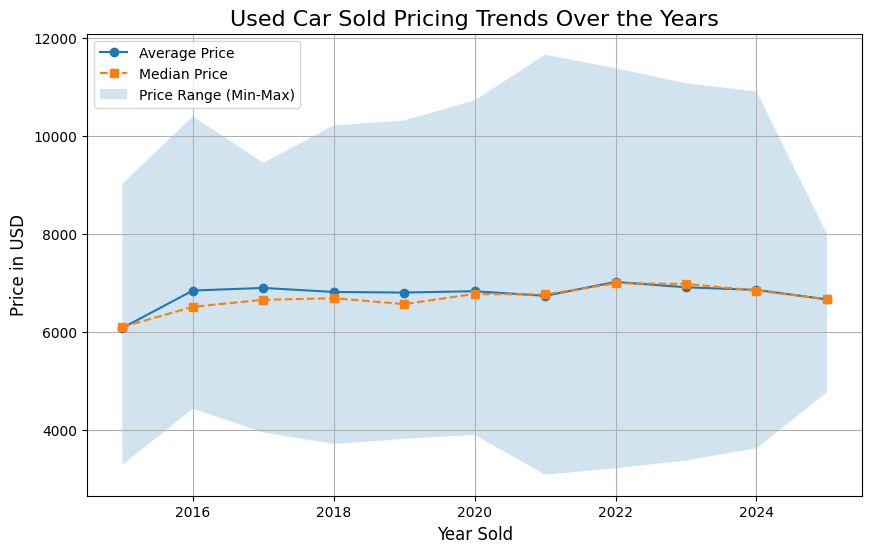

In [416]:
plt.figure(figsize=(10, 6))
plt.plot(pricing_trends3.index, pricing_trends3['mean'], label='Average Price', marker='o')
plt.plot(pricing_trends3.index, pricing_trends3['median'], label='Median Price', linestyle='--', marker='s')
plt.fill_between(pricing_trends3.index, pricing_trends3['min'], pricing_trends3['max'], alpha=0.2, label='Price Range (Min-Max)')
plt.title('Used Car Sold Pricing Trends Over the Years', fontsize=16)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [417]:
monthly_pricing = dfsolddate.groupby('Month-Year Sold')['Purchased Price-$'].mean()

In [418]:
monthly_pricing

Month-Year Sold
2015-03    6522.000000
2015-05    6110.666667
2015-06    5631.000000
2015-07    6078.000000
2015-09    5364.500000
              ...     
2024-10    6456.357143
2024-11    6954.125000
2024-12    6586.183333
2025-01    6369.375000
2025-02    6756.000000
Freq: M, Name: Purchased Price-$, Length: 118, dtype: float64

In [419]:
monthly_pricing.index = monthly_pricing.index.to_timestamp()

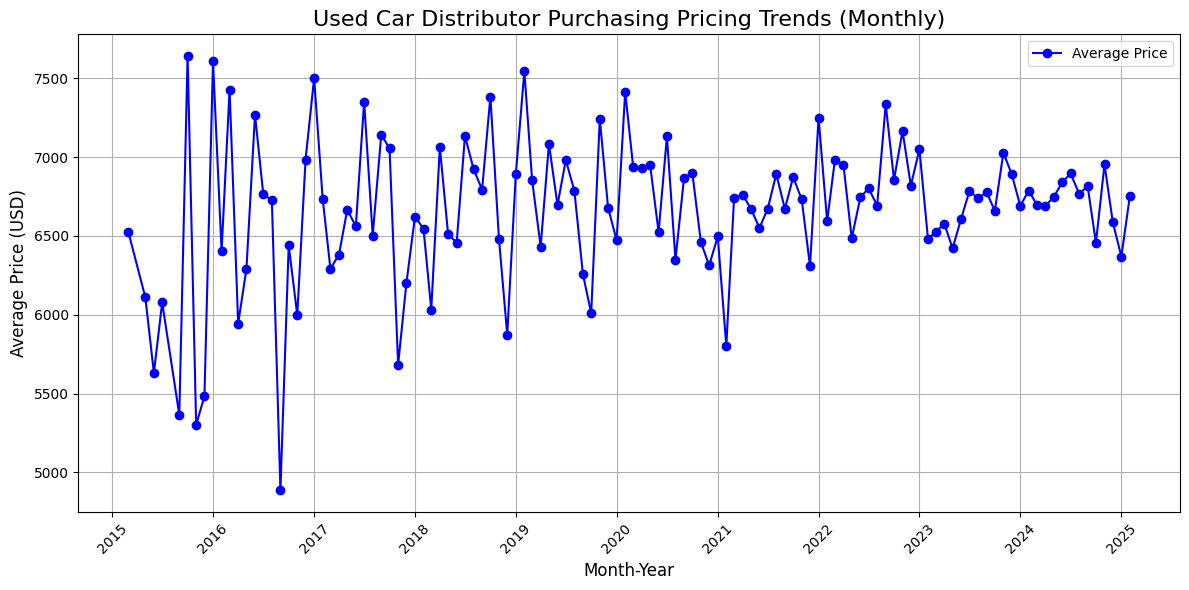

In [420]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_pricing.index, monthly_pricing.values, label='Average Price', marker='o', color='blue')
plt.title('Used Car Distributor Purchasing Pricing Trends (Monthly)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [421]:
monthly_pricing2 = dfsolddate.groupby('Month-Year Sold')['Sold Price-$'].mean()

In [422]:
monthly_pricing2.index = monthly_pricing2.index.to_timestamp()

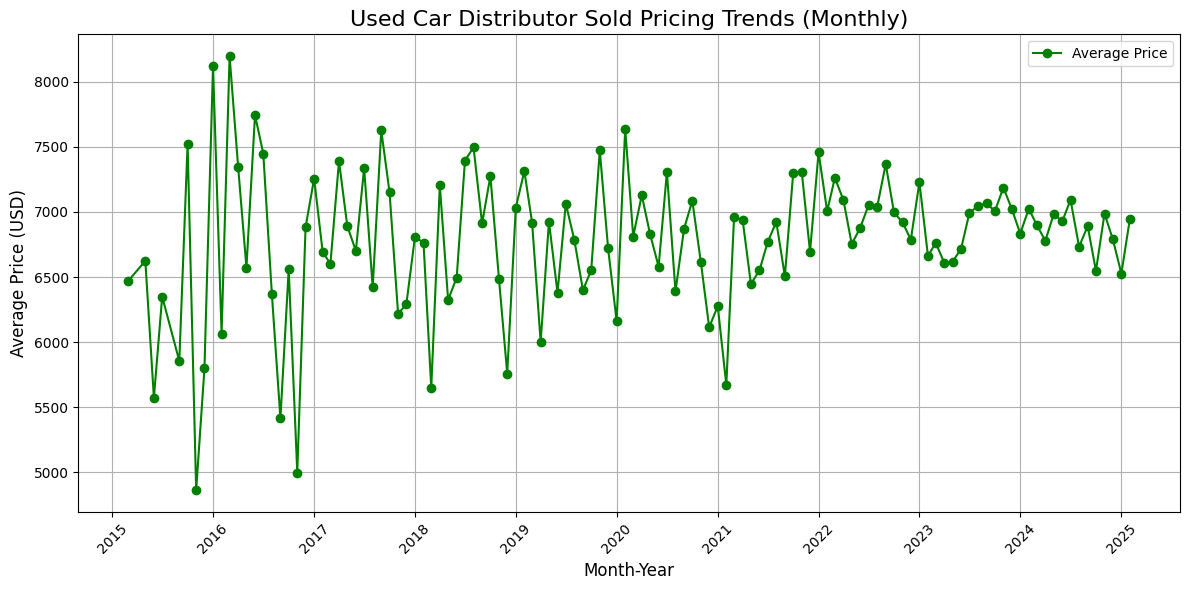

In [423]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_pricing2.index, monthly_pricing2.values, label='Average Price', marker='o', color='Green')
plt.title('Used Car Distributor Sold Pricing Trends (Monthly)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Seasonality Analysis

### 1. Look for recurring patterns (e.g., higher sales during specific months or quarters)

In [424]:
dfsolddate['Month Sold'] = df['Sold Date'].dt.month

In [425]:
dfsolddate['Month Sold'] = dfsolddate['Month Sold'].astype('Int64')

In [426]:
monthly_sales = dfsolddate.groupby('Month Sold').size()

In [427]:
monthly_sales

Month Sold
1     144
2     116
3     189
4     175
5     200
6     182
7     205
8     228
9     185
10    173
11    167
12    202
dtype: int64

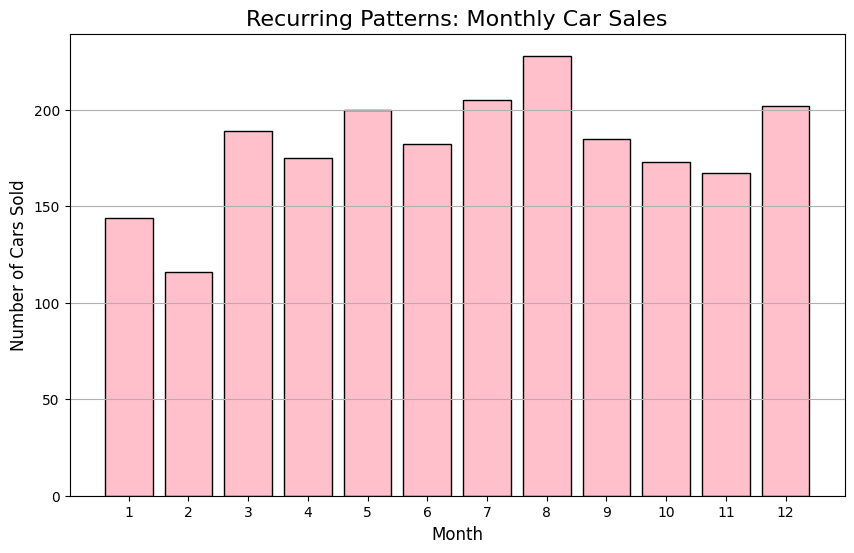

In [428]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='Pink', edgecolor='black')
plt.title('Recurring Patterns: Monthly Car Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(range(1, 13))  # Ensure all months (1 to 12) are labeled
plt.grid(axis='y')
plt.show()

In [429]:
dfsolddate['Quarter Sold'] = df['Sold Date'].dt.quarter

In [430]:
dfsolddate['Quarter Sold'] = dfsolddate['Quarter Sold'].astype('Int64')

In [431]:
quarterly_sales = dfsolddate.groupby('Quarter Sold').size()

In [432]:
quarterly_sales

Quarter Sold
1    449
2    557
3    618
4    542
dtype: int64

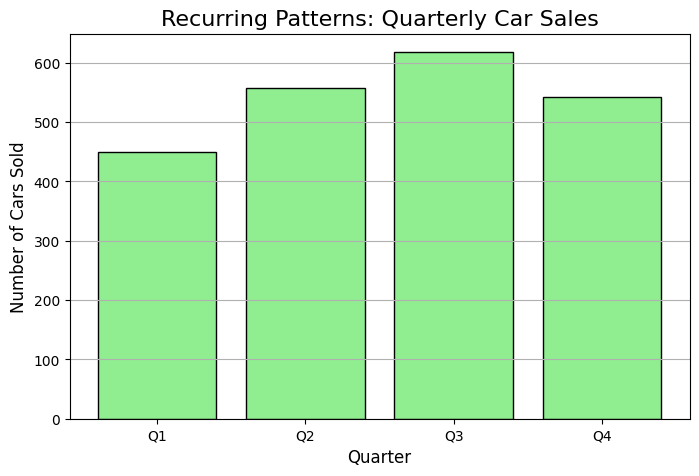

In [433]:
plt.figure(figsize=(8, 5))
plt.bar(quarterly_sales.index, quarterly_sales.values, color='lightgreen', edgecolor='black')
plt.title('Recurring Patterns: Quarterly Car Sales', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(range(1, 5), labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Label quarters
plt.grid(axis='y')
plt.show()

In [434]:
dfsolddate['Year'] = dfsolddate['Month-Year Sold'].dt.year
dfsolddate['Month'] = dfsolddate['Month-Year Sold'].dt.month

In [435]:
year_month_sales = dfsolddate.groupby(['Year', 'Month']).size()

In [436]:
monthly_comparison = year_month_sales.unstack(level=0)

In [437]:
monthly_comparison

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Month,,,,,,,,,,,
1,NaN,3.0,8.0,3.0,10.0,12.0,14.0,17.0,25.0,44.0,8.0
2,NaN,6.0,3.0,5.0,14.0,8.0,11.0,12.0,24.0,29.0,4.0
3,1.0,3.0,4.0,4.0,15.0,13.0,29.0,29.0,40.0,51.0,NaN
4,NaN,3.0,3.0,10.0,14.0,19.0,15.0,15.0,34.0,62.0,NaN
5,3.0,7.0,11.0,5.0,11.0,14.0,18.0,33.0,40.0,58.0,NaN
6,3.0,2.0,13.0,10.0,14.0,11.0,15.0,31.0,28.0,55.0,NaN
7,4.0,6.0,8.0,8.0,19.0,19.0,16.0,43.0,36.0,46.0,NaN
8,NaN,4.0,10.0,13.0,16.0,12.0,22.0,42.0,41.0,68.0,NaN
9,2.0,2.0,7.0,16.0,15.0,14.0,18.0,19.0,36.0,56.0,NaN


In [438]:
monthly_comparison = monthly_comparison.fillna(0)

In [439]:
monthly_comparison 

Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Month,,,,,,,,,,,
1,0.0,3.0,8.0,3.0,10.0,12.0,14.0,17.0,25.0,44.0,8.0
2,0.0,6.0,3.0,5.0,14.0,8.0,11.0,12.0,24.0,29.0,4.0
3,1.0,3.0,4.0,4.0,15.0,13.0,29.0,29.0,40.0,51.0,0.0
4,0.0,3.0,3.0,10.0,14.0,19.0,15.0,15.0,34.0,62.0,0.0
5,3.0,7.0,11.0,5.0,11.0,14.0,18.0,33.0,40.0,58.0,0.0
6,3.0,2.0,13.0,10.0,14.0,11.0,15.0,31.0,28.0,55.0,0.0
7,4.0,6.0,8.0,8.0,19.0,19.0,16.0,43.0,36.0,46.0,0.0
8,0.0,4.0,10.0,13.0,16.0,12.0,22.0,42.0,41.0,68.0,0.0
9,2.0,2.0,7.0,16.0,15.0,14.0,18.0,19.0,36.0,56.0,0.0


In [440]:
monthly_comparison = monthly_comparison.astype(int)

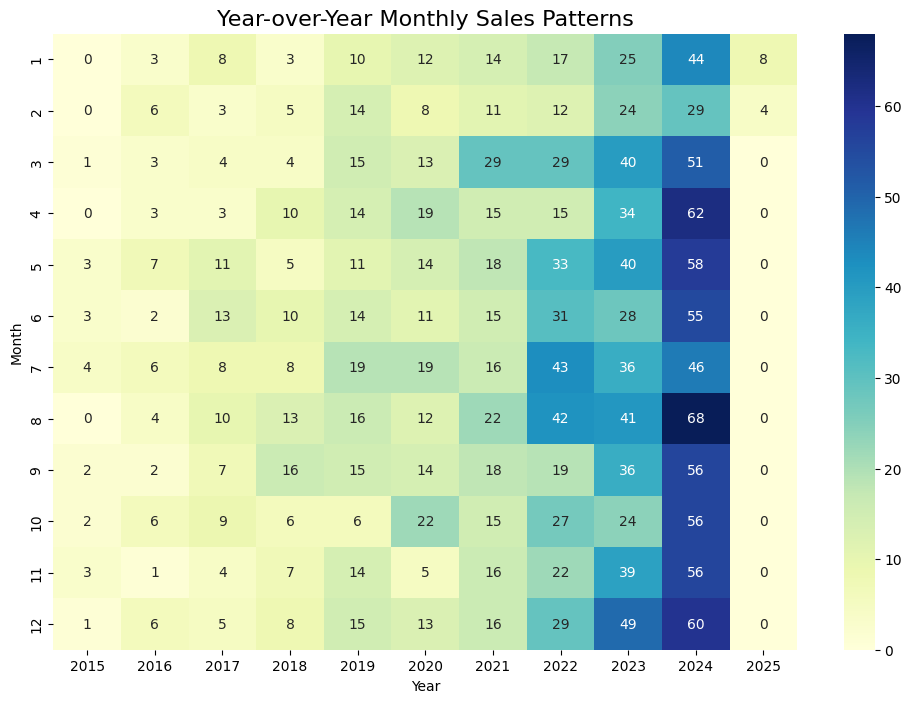

In [441]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_comparison, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Year-over-Year Monthly Sales Patterns', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

### 2. Analyze Seasonal Demand for Specific Car Types

In [442]:
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Fall
        return 'Fall'
dfsolddate['Season'] = dfsolddate['Sold Date'].dt.month.apply(get_season)

In [443]:
dfsolddate['Car Type'].value_counts()

Car Type
Hatchback      679
SUV            661
Truck          361
Sedan          303
Convertible    162
Name: count, dtype: int64

In [444]:
filtered_data = dfsolddate[dfsolddate['Car Type'].isin(['SUV', 'Convertible','Hatchback', 'Truck', 'Sedan'])]

In [445]:
filtered_data

,ID,Distributor Name,Location,Car Name,Manufacturer Name,Car Type,Color,Gearbox,Number of Seats,Number of Doors,...,Sales Rating,Sales Commission-$,Feedback,Year Sold,Month-Year Sold,Month Sold,Quarter Sold,Year,Month,Season
1,EPMPC8,Carousell,Philadelphia,Creta,Hyundai,Hatchback,Blue,Automatic,5,5,...,5,0,Good,2021,2021-03,3,1,2021,3,Spring
3,PWP2QK,Trivett,North Carolina,Plato,Prazo,Convertible,Gray,Automatic,2,2,...,1,205,Average,2024,2024-04,4,2,2024,4,Spring
5,I5D584,Zupps,Denver,Fortuner,Toyota,SUV,Red,Automatic,8,5,...,5,279,Excellent,2024,2024-11,11,4,2024,11,Fall
14,IKYB6R,Nufor,Tucson,Scorpio,Mahindra,SUV,Red,Automatic,5,5,...,2,68,Excellent,2022,2022-10,10,4,2022,10,Fall
17,U7L0OA,Carmix,Philadelphia,Creta,Hyundai,Hatchback,Red,Automatic,5,5,...,1,0,Good,2024,2024-05,5,2,2024,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,1LMJ4Z,Cars24,Oklahoma,Swift,Maruti,Sedan,Red,Manual,5,4,...,3,0,Excellent,2024,2024-05,5,2,2024,5,Spring
9981,CFT40G,Skipper,Philadelphia,Etriga,Maruti,Hatchback,Black,Automatic,4,5,...,1,30,Excellent,2021,2021-04,4,2,2021,4,Spring
9983,G0K5HM,Motor,Tennessee,Seltos,Kia,Hatchback,Red,Automatic,5,5,...,5,122,Excellent,2023,2023-05,5,2,2023,5,Spring
9993,FCFG98,Carmudi,Florida,Scorpio,Mahindra,SUV,Black,Automatic,5,5,...,3,0,Good,2016,2016-02,2,1,2016,2,Winter


In [446]:
seasonal_demand = filtered_data.groupby(['Season', 'Car Type']).size().unstack()

In [447]:
seasonal_demand

Car Type,Convertible,Hatchback,SUV,Sedan,Truck
Season,,,,,
Fall,38,149,160,86,92
Spring,42,185,178,70,89
Summer,50,186,186,84,109
Winter,32,159,137,63,71


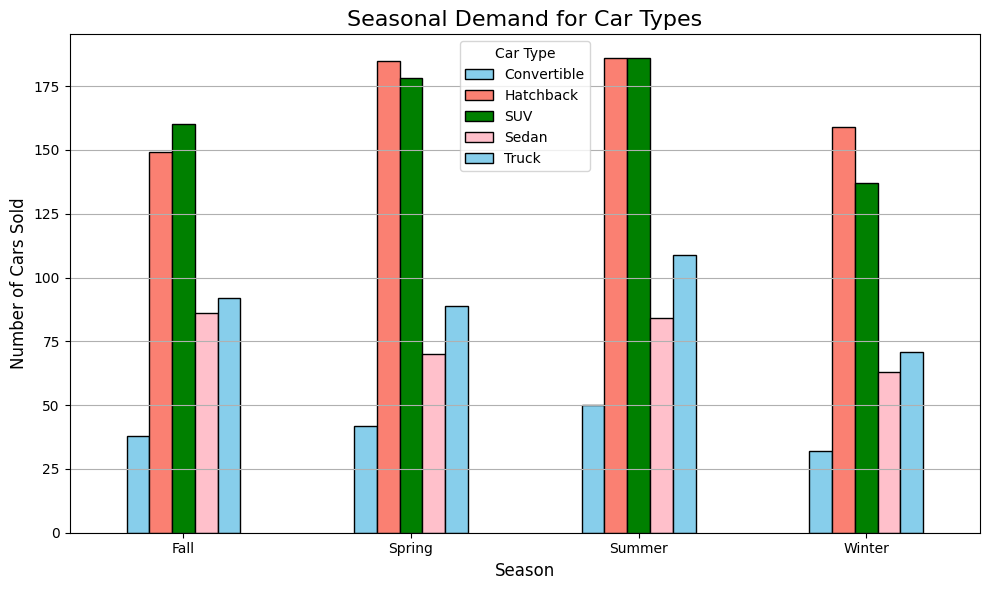

In [448]:
seasonal_demand.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')
plt.title('Seasonal Demand for Car Types', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Car Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [449]:
seasonal_pricing1 = filtered_data.groupby(['Season', 'Car Type'])['Purchased Price-$'].mean().unstack()

In [450]:
seasonal_pricing2 = filtered_data.groupby(['Season', 'Car Type'])['Sold Price-$'].mean().unstack()

<Axes: xlabel='Season'>

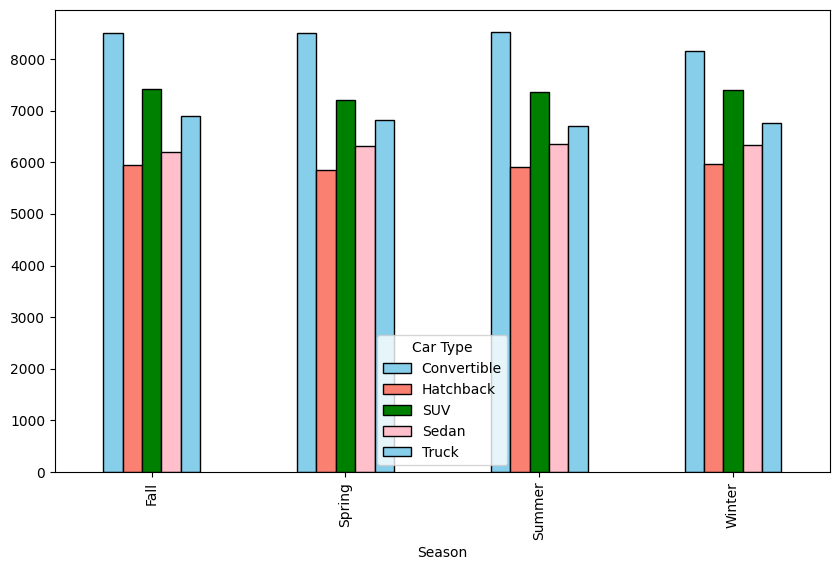

In [451]:
seasonal_pricing1.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')

<Axes: xlabel='Season'>

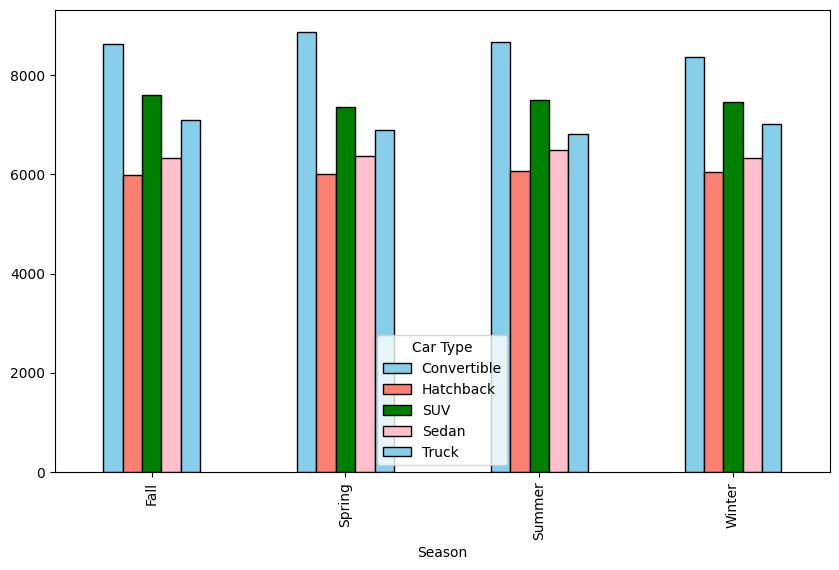

In [452]:
seasonal_pricing2.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'Green','Pink'], edgecolor='black')

In [453]:
filtered_data['Year'] = filtered_data['Sold Date'].dt.year

In [454]:
yearly_seasonal_demand = filtered_data.groupby(['Year', 'Season', 'Car Type']).size().unstack()

In [455]:
yearly_seasonal_demand

Car Type     Convertible  Hatchback   SUV  Sedan  Truck
Year Season                                            
2015 Fall            NaN        5.0   1.0    1.0    NaN
     Spring          NaN        1.0   1.0    1.0    1.0
     Summer          NaN        2.0   1.0    1.0    3.0
     Winter          NaN        1.0   NaN    NaN    NaN
2016 Fall            1.0        3.0   1.0    4.0    NaN
     Spring          1.0        7.0   3.0    NaN    2.0
     Summer          2.0        3.0   2.0    2.0    3.0
     Winter          2.0        8.0   4.0    NaN    1.0
2017 Fall            2.0        7.0   5.0    2.0    4.0
     Spring          2.0        8.0   3.0    1.0    4.0
     Summer          3.0       11.0   8.0    6.0    3.0
     Winter          2.0        5.0   4.0    NaN    5.0
2018 Fall            3.0        7.0   8.0    3.0    8.0
     Spring          2.0        6.0   6.0    3.0    2.0
     Summer          4.0       10.0   7.0    5.0    5.0
     Winter          NaN        5.0   4.0    3.0    4.0
2019 Fall            2.0       13.0   8.0    5.0    7.0
     Spring          3.0       11.0  12.0    8.0    6.0
     Summer          5.0       14.0  15.0    7.0    8.0
     Winter          5.0        9.0   9.0    9.0    7.0
2020 Fall            1.0        9.0  10.0    9.0   12.0
     Spring          1.0       12.0  14.0    7.0   12.0
     Summer          4.0       13.0   9.0    4.0   12.0
     Winter          3.0       11.0  10.0    4.0    5.0
2021 Fall            7.0       16.0  15.0    7.0    4.0
     Spring          4.0       18.0  21.0   11.0    8.0
     Summer          2.0       14.0  21.0    7.0    9.0
     Winter          1.0       17.0  11.0    7.0    5.0
2022 Fall            7.0       14.0  24.0   13.0   10.0
     Spring          9.0       22.0  21.0   12.0   13.0
     Summer         14.0       33.0  34.0   15.0   20.0
     Winter          5.0       21.0  14.0    8.0   10.0
2023 Fall            5.0       22.0  38.0   14.0   20.0
     Spring          5.0       42.0  41.0   10.0   16.0
     Summer          8.0       35.0  31.0   16.0   15.0
     Winter          5.0       33.0  39.0   11.0   10.0
2024 Fall           10.0       53.0  50.0   28.0   27.0
     Spring         15.0       58.0  56.0   17.0   25.0
     Summer          8.0       51.0  58.0   21.0   31.0
     Winter          9.0       46.0  38.0   17.0   23.0
2025 Winter          NaN        3.0   4.0    4.0    1.0

In [456]:
yearly_seasonal_demand = yearly_seasonal_demand.fillna(0)

In [457]:
yearly_seasonal_demand

Car Type     Convertible  Hatchback   SUV  Sedan  Truck
Year Season                                            
2015 Fall            0.0        5.0   1.0    1.0    0.0
     Spring          0.0        1.0   1.0    1.0    1.0
     Summer          0.0        2.0   1.0    1.0    3.0
     Winter          0.0        1.0   0.0    0.0    0.0
2016 Fall            1.0        3.0   1.0    4.0    0.0
     Spring          1.0        7.0   3.0    0.0    2.0
     Summer          2.0        3.0   2.0    2.0    3.0
     Winter          2.0        8.0   4.0    0.0    1.0
2017 Fall            2.0        7.0   5.0    2.0    4.0
     Spring          2.0        8.0   3.0    1.0    4.0
     Summer          3.0       11.0   8.0    6.0    3.0
     Winter          2.0        5.0   4.0    0.0    5.0
2018 Fall            3.0        7.0   8.0    3.0    8.0
     Spring          2.0        6.0   6.0    3.0    2.0
     Summer          4.0       10.0   7.0    5.0    5.0
     Winter          0.0        5.0   4.0    3.0    4.0
2019 Fall            2.0       13.0   8.0    5.0    7.0
     Spring          3.0       11.0  12.0    8.0    6.0
     Summer          5.0       14.0  15.0    7.0    8.0
     Winter          5.0        9.0   9.0    9.0    7.0
2020 Fall            1.0        9.0  10.0    9.0   12.0
     Spring          1.0       12.0  14.0    7.0   12.0
     Summer          4.0       13.0   9.0    4.0   12.0
     Winter          3.0       11.0  10.0    4.0    5.0
2021 Fall            7.0       16.0  15.0    7.0    4.0
     Spring          4.0       18.0  21.0   11.0    8.0
     Summer          2.0       14.0  21.0    7.0    9.0
     Winter          1.0       17.0  11.0    7.0    5.0
2022 Fall            7.0       14.0  24.0   13.0   10.0
     Spring          9.0       22.0  21.0   12.0   13.0
     Summer         14.0       33.0  34.0   15.0   20.0
     Winter          5.0       21.0  14.0    8.0   10.0
2023 Fall            5.0       22.0  38.0   14.0   20.0
     Spring          5.0       42.0  41.0   10.0   16.0
     Summer          8.0       35.0  31.0   16.0   15.0
     Winter          5.0       33.0  39.0   11.0   10.0
2024 Fall           10.0       53.0  50.0   28.0   27.0
     Spring         15.0       58.0  56.0   17.0   25.0
     Summer          8.0       51.0  58.0   21.0   31.0
     Winter          9.0       46.0  38.0   17.0   23.0
2025 Winter          0.0        3.0   4.0    4.0    1.0

In [458]:
yearly_seasonal_demand = yearly_seasonal_demand.astype(int)

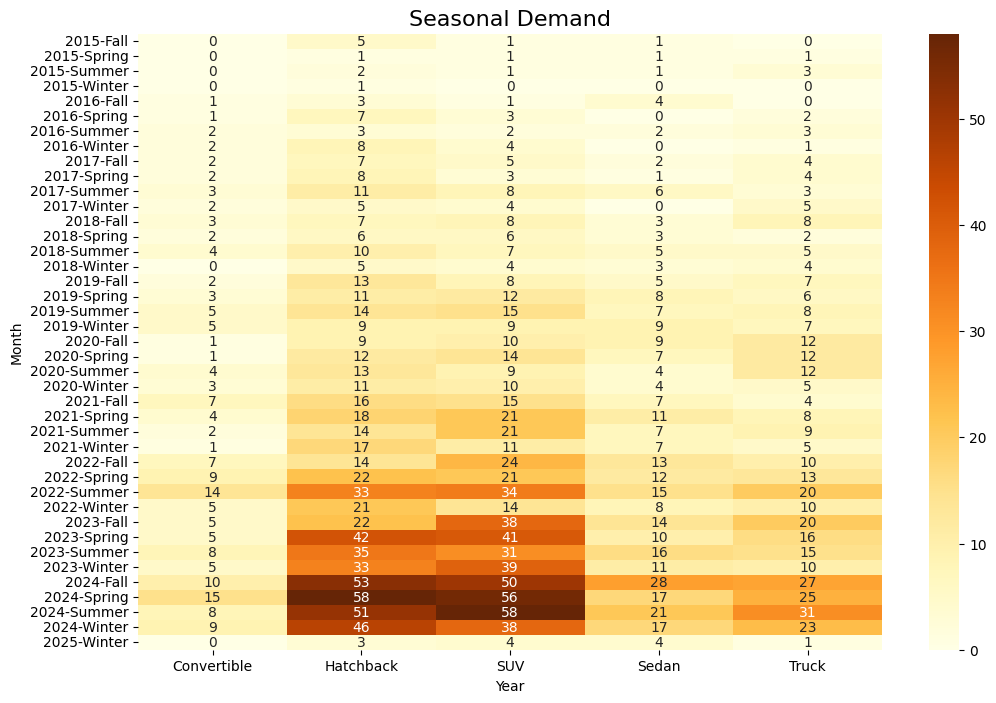

In [459]:
plt.figure(figsize=(12, 8))
sns.heatmap(yearly_seasonal_demand, annot=True, fmt='d', cmap='YlOrBr', cbar=True)
plt.title('Seasonal Demand', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()